# Aula 6 (04/11/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

## Modificação da transformada de Hough

---

Um espaço de parâmetro de alta dimensão para a Transformada de Hough não é apenas lento, mas se implementado sem premeditação pode facilmente ultrapassar a memória disponível. Mesmo que o ambiente de programação permita a alocação de um array maior que o espaço de memória disponível através da memória virtual, o número de trocas de páginas necessárias para isso será muito exigente, pois o array de acumuladores é utilizado de forma acessada aleatoriamente, raramente parando em memória contígua como ele pula de índice para índice

Considere a tarefa de encontrar elipses em uma imagem de 800 x 600. Assumindo que os raios das elipses são orientados ao longo dos eixos principais, o espaço de parâmetros é quadridimensional. (x,y) define o centro da elipse, e a e b denotam os dois raios. Permitir que o centro esteja em qualquer lugar da imagem adiciona a restrição 0<x<800 e 0<y<600. Se os raios receberem os mesmos valores que as restrições, o que sobrará é uma matriz de acumuladores esparsamente preenchida com mais de 230 bilhões de valores. O Matlab possui funções voltadas especificamente para matrizes esparsas, mas elas lidam apenas com matrizes bidimensionais, não quadridimensionais.

### Randomized Hough Transform (RHT)

Randomized Hough Transform (RHT) é uma versão improvisada da Standard Hough Transform (SHT) para detecção de linhas. A ideia básica por trás da Randomized Hough Transform é que, em vez de transformar um pixel do espaço da imagem para o espaço do parâmetro, dois ou mais pixels são selecionados aleatoriamente e mapeados para um ponto no espaço do parâmetro.

Esse método seleciona aleatoriamente dois ou mais pixels e os mapeia em um ponto no espaço de parâmetros. Assim, em vez de cada pixel ser mapeado em todas as combinações possíveis de ρ e θ, um par de pixels é mapeado em um ponto no espaço (ρ,θ). O tamanho do acumulador necessário para executar este mapeamento é muito menor do que a abordagem da Transformada Hough Padrão.

![RHT](https://user-images.githubusercontent.com/50799373/202851858-81bcf230-84d7-4271-809b-676a56309079.png)

Essa função pode ser implementada através da Transformada de Hough Probabilística, no Opencv.  

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

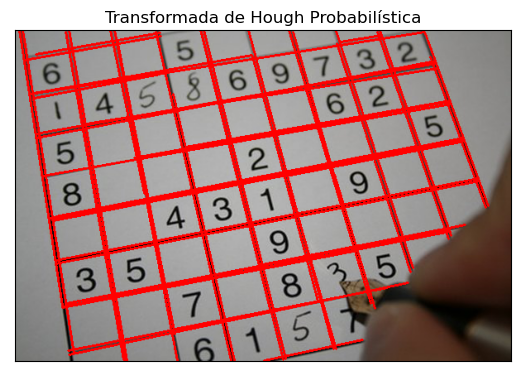

<Figure size 600x600 with 0 Axes>

In [19]:
img_cartao = cv2.imread('images\\fotolia.jpg')

gray = cv2.cvtColor(img_cartao,cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,(5))

edges = cv2.Canny(gray,50,150,apertureSize = 3) # Criar a detecção de bordas

# Aplicar Hough lines com Progressive Probabilistic Hough Transform 
# para a detecção de bordas. Linhas com tamanho mínimo de 10 e
# Gap máximo entre pixels de 50 para ser considerado linha. 
plines = cv2.HoughLinesP(edges,1,np.pi/180,90,minLineLength=10,maxLineGap=50) 

# Desenhar as linhas encontradas
for line in plines:
    px1,py1,px2,py2 = line[0]
    cv2.line(img_cartao,(px1,py1),(px2,py2),(0,0,255), 2)

    # Plotar todos os resultados
image = cv2.cvtColor(img_cartao, cv2.COLOR_BGR2RGB)
plt.plot(),plt.imshow(image)
plt.title("Transformada de Hough Probabilística")
plt.xticks([]),plt.yticks([])
plt.figure(figsize=(6,6))
plt.show()